# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
import pandas as pd
import requests
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('C://Users/rober/Downloads/twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open('dog_predictions.tsv', mode = 'wb') as file:
    file.write(response.content)
df2 = pd.read_csv('dog_predictions.tsv', sep = '\t')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [4]:
df3 = pd.read_json('tweetjson.txt', lines= True)
df3 = df3[['id', 'retweet_count', 'favorite_count']]

In [5]:
df.sample(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1143,727314416056803329,NaN,NaN,2016-05-03 01:50:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This pupper was about to explain where that di...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/727314416...,11,10,None,None,None,pupper,None


In [6]:
df2.sample(1)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
537,676948236477857792,https://pbs.twimg.com/media/CWUA1GFW4AAowiq.jpg,1,guenon,0.611603,False,macaque,0.135176,False,squirrel_monkey,0.083247,False


In [7]:
df3.sample(1)

,id,retweet_count,favorite_count
2022,671891728106971137,618,1415


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [8]:
pd.set_option('display.max_columns', 500)
pd.set_option('max_colwidth', 800)

In [9]:
df.info()
## incorrect datatypes, several unneeded columns, lots of null values in some columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [10]:
df2.info()
## unclear column names

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [11]:
df3.info()
## id column named differently than other tables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [12]:
df.head()
## Null values listed incorrectly as 'None'

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


In [13]:
df2.head()
## inconsistent capitlisation

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [14]:
df3.head()
## id column same info stored in tweet_id column

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [15]:
df.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888022790149/photo/1,8,10,None,None,None,None,None


In [16]:
df2.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [17]:
df3.tail()

,id,retweet_count,favorite_count
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132
2353,666020888022790149,532,2535


In [18]:
df.rating_denominator.value_counts()
## 3 denominators below 10, possibly incorrect

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

In [19]:
df.query("rating_denominator == 0")
## no dog rating at all

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",NaN,NaN,NaN,NaN,960,0,None,None,None,None,None


In [20]:
df2.query("tweet_id == 835246439529840640")
## no picture attached to this tweet either

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [21]:
df.retweeted_status_id.notnull().sum()
## 181 retweets in the dataset

181

In [22]:
df.name.unique()
## unlikely name values present, inconsistent capitalisation appears to indicate values that are not actually names

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

In [23]:
df.source.value_counts()
## source information hidden in lots of unneeded text, could be extracted to make it easier to read/easier to analyse

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [24]:
df.rating_numerator.describe()

count    2356.000000
mean       13.126486
std        45.876648
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

In [25]:
df.rating_denominator.describe()

count    2356.000000
mean       10.455433
std         6.745237
min         0.000000
25%        10.000000
50%        10.000000
75%        10.000000
max       170.000000
Name: rating_denominator, dtype: float64

In [26]:
df.query("doggo ! = 'None' and (pupper != 'None' or floofer != 'None' or puppo != 'None')")

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
191,855851453814013952,NaN,NaN,2017-04-22 18:31:02 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel,NaN,NaN,NaN,https://twitter.com/dog_rates/status/855851453814013952/photo/1,13,10,None,doggo,None,None,puppo
200,854010172552949760,NaN,NaN,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/854010172552949760/photo/1,https://twitter.com/dog_rates/status/854010172552949760/photo/1",11,10,None,doggo,floofer,None,None
460,817777686764523521,NaN,NaN,2017-01-07 16:59:28 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Dido. She's playing the lead role in ""Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple."" 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7",NaN,NaN,NaN,https://twitter.com/dog_rates/status/817777686764523521/video/1,13,10,Dido,doggo,None,pupper,None
531,808106460588765185,NaN,NaN,2016-12-12 00:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho,NaN,NaN,NaN,https://twitter.com/dog_rates/status/808106460588765185/photo/1,12,10,None,doggo,None,pupper,None
565,802265048156610565,7.331095e+17,4.196984e+09,2016-11-25 21:37:47 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Like doggo, like pupper version 2. Both 11/10 https://t.co/9IxWAXFqze",NaN,NaN,NaN,https://twitter.com/dog_rates/status/802265048156610565/photo/1,11,10,None,doggo,None,pupper,None
575,801115127852503040,NaN,NaN,2016-11-22 17:28:25 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/801115127852503040/photo/1,https://twitter.com/dog_rates/status/801115127852503040/photo/1",12,10,Bones,doggo,None,pupper,None
705,785639753186217984,NaN,NaN,2016-10-11 00:34:48 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Pinot. He's a sophisticated doggo. You can tell by the hat. Also pointier than your average pupper. Still 10/10 would pet cautiously https://t.co/f2wmLZTPHd,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/785639753186217984/photo/1,https://twitter.com/dog_rates/status/785639753186217984/photo/1",10,10,Pinot,doggo,None,pupper,None
733,781308096455073793,NaN,NaN,2016-09-29 01:42:20 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>","Pupper butt 1, Doggo 0. Both 12/10 https://t.co/WQvcPEpH2u",NaN,NaN,NaN,https://vine.co/v/5rgu2Law2ut,12,10,None,doggo,None,pupper,None
778,775898661951791106,NaN,NaN,2016-09-14 03:27:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: Like father (doggo), like son (pupper). Both 12/10 https://t.co/pG2inLaOda",7.331095e+17,4.196984e+09,2016-05-19 01:38:16 +0000,"https://twitter.com/dog_rates/status/733109485275860992/photo/1,https://twitter.com/dog_rates/status/733109485275860992/photo/1",12,10,None,doggo,None,pupper,None
822,770093767776997377

In [27]:
df.timestamp.min()

'2015-11-15 22:32:08 +0000'

In [28]:
df.timestamp.max()

'2017-08-01 16:23:56 +0000'

### Quality issues
1. 'timestamp' & 'retweeted_status_timestamp' is of type object rather than datetime

2. some Nan values are listed as 'None'

3. 181 'retweeted_status_id' values means there are retweets present

4. some 'name' values invalid, e.g. 'a', 'all', 'an'

5. inconsistent capitalisation in 'p1', 'p2', 'p3' columns could result in multiple categorisations for the same value

6. incorrect rating denominators, some below 10 

7. undescriptive/unclear column names such as 'p1', 'p1_conf' etc

8. 'source' column can be simplified into categories to make it easier to read

### Tidiness issues
1. the three tables can be merged into one for easier viewing of information

2. dog stages ('doggo', 'floofer', 'pupper' & 'puppo' columns) could all be one column rather than four

3. some columns are irrelevant as they are/will be empty or duplicate columns (columns relating to retweets, id etc.)

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [29]:
# Make copies of original pieces of data
df_copy = df.copy()
df2_copy = df2.copy()
df3_copy = df3.copy()

### Tidiness Issue #1:

#### Define:

#### Merge the three tables together into one dataset to make accessing information easier

#### Code

In [30]:
df_clean = pd.merge(pd.merge(df_copy, df2_copy, on='tweet_id', how = 'inner'), df3_copy ,left_on='tweet_id', right_on = 'id', how = 'inner')

#### Test

In [31]:
df_clean.sample(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,id,retweet_count,favorite_count
1104,706346369204748288,NaN,NaN,2016-03-06 05:11:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Koda. She's a Beneboom Cumberwiggle. 12/10 petable as hell https://t.co/VZV6oMJmU6,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/706346369204748288/photo/1,https://twitter.com/dog_rates/status/706346369204748288/photo/1",12,10,Koda,None,None,None,None,https://pbs.twimg.com/media/Cc1yRE2WoAAgxFQ.jpg,1,Tibetan_mastiff,0.956462,True,Rottweiler,0.025381,True,Appenzeller,0.008679,True,706346369204748288,1035,3768


In [32]:
df_clean.shape

(2073, 31)

### Tidiness Issue #2:

#### Define

#### Join all dog type columns into one definitive dog stage column

#### Code

In [33]:
df_clean[['doggo', 'pupper', 'puppo', 'floofer']] = df_clean[['doggo', 'pupper', 'puppo', 'floofer']].replace('None', '')
df_clean['dog_type'] = df_clean.doggo + df_clean.pupper + df_clean.puppo + df_clean.floofer

In [34]:
df_clean['dog_type'] = df_clean['dog_type'].replace({'doggopupper': 'doggo-pupper', 'doggopuppo':'doggo-puppo', 'doggofloofer': 'doggo-floofer'})

In [35]:
df_clean['dog_type'] = df_clean['dog_type'].replace('', np.nan)

#### Test

In [36]:
df_clean['dog_type'].value_counts()

pupper           210
doggo             67
puppo             23
doggo-pupper      11
floofer            7
doggo-puppo        1
doggo-floofer      1
Name: dog_type, dtype: int64

### Quality Issue #1:

#### Define

#### Correct the datatype of the 'timestamp' column from object to datetime

In [37]:
df_clean['timestamp'] = df_clean['timestamp'].astype('datetime64')

#### Test

In [38]:
df_clean.timestamp.info()

<class 'pandas.core.series.Series'>
Int64Index: 2073 entries, 0 to 2072
Series name: timestamp
Non-Null Count  Dtype         
--------------  -----         
2073 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 32.4 KB


### Quality Issue #2:

#### Define

#### Replace all 'None' values with NaN

#### Code

In [39]:
df_clean = df_clean.replace('None', np.nan)

#### Test

In [40]:
df_clean.isna()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,id,retweet_count,favorite_count,dog_type
0,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
3,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
4,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2068,False,True,True,False,False,False,True,True,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2069,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2070,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2071,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


### Quality Issue #3:

#### Define

#### Remove all rows that contain information from retweets, only original tweets wanted

#### Code

In [41]:
## removing all rows that have a retweet value i.e. all rows that are info from retweets
df_clean = df_clean[pd.isnull(df_clean['retweeted_status_id'])]

#### Test

In [42]:
df_clean.shape

(1994, 32)

In [43]:
df_clean.retweeted_status_id.isna().sum()

1994

### Tidiness Issue #3:

#### Define

#### Now we have the retweets removed, we can remove the columns as they are now redundant, such as 'retweeted_status_id'

#### Code

In [44]:
## removing columns related to retweets
df_clean = df_clean.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis = 1)

#### Test

In [45]:
df_clean.sample(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,id,retweet_count,favorite_count,dog_type
688,765719909049503744,NaN,NaN,2016-08-17 01:20:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Brat. He has a hard time being ferocious so his owner helps out. H*ckin scary af now. 12/10 would still pet https://t.co/soxdNqZDZ2,https://twitter.com/dog_rates/status/765719909049503744/photo/1,12,10,Brat,,,,,https://pbs.twimg.com/media/CqBiMAgWAAEJKgI.jpg,1,golden_retriever,0.969518,True,Labrador_retriever,0.021696,True,Border_terrier,0.002075,True,765719909049503744,2475,8021,NaN


### Quality Issue #4:

#### Define

#### Remove invalid name values and replace with 'Unknown'

#### Code

In [46]:
## visually found all incorrect name values and compiled into a list to make swapping them out easier
swaps = ['a', 'actually', 'all', 'an', 'by', 'getting', 'his', 'incredibly', 'infuriating', 'just', 'light', 'my', 'not', 'officially', 'one', 'quite', 'space', 'such', 'the', 'this', 'unacceptable', 'very']
df_clean['name'] = df_clean['name'].replace(swaps, np.nan)

#### Test

In [47]:
df_clean.name.value_counts()

Charlie       11
Cooper        10
Lucy          10
Oliver        10
Penny          9
              ..
Leela          1
Glenn          1
Shelby         1
Sephie         1
Christoper     1
Name: name, Length: 913, dtype: int64

### Quality Issue #5:

#### Define

#### Set consistent standard of capitalisation across prediction columns

#### Code

In [48]:
## changing all values to lowercase for consistency
df_clean['p1'] = df_clean['p1'].str.lower()

In [49]:
df_clean['p2'] = df_clean['p2'].str.lower()

In [50]:
df_clean['p3'] = df_clean['p3'].str.lower()

#### Test

In [51]:
df_clean.p1.value_counts()

golden_retriever      139
labrador_retriever     95
pembroke               88
chihuahua              79
pug                    54
                     ... 
nail                    1
timber_wolf             1
espresso                1
bib                     1
desktop_computer        1
Name: p1, Length: 374, dtype: int64

In [52]:
df_clean.p2.value_counts()

labrador_retriever          96
golden_retriever            82
cardigan                    73
chihuahua                   43
chesapeake_bay_retriever    40
                            ..
hatchet                      1
minibus                      1
screw                        1
coffee_mug                   1
mud_turtle                   1
Name: p2, Length: 400, dtype: int64

In [53]:
df_clean.p3.value_counts()

labrador_retriever    76
chihuahua             57
golden_retriever      46
eskimo_dog            36
kelpie                33
                      ..
passenger_car          1
bannister              1
rotisserie             1
hand_blower            1
partridge              1
Name: p3, Length: 405, dtype: int64

### Quality Issue #6:

#### Define

#### Fix incorrect denominators or remove tweet if not a dog rating

#### Code

In [54]:
df_clean.query("rating_denominator < 10")
## checking for any denominators under 10. 415 has no rating in the text, appears to be a gofundme rather than a dog rating. 2052 mixed up the numbers from the tweet and confused the 3 1/2 legged dog for a rating

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,id,retweet_count,favorite_count,dog_type
415,810984652412424192,NaN,NaN,2016-12-19 23:06:23,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",24,7,Sam,,,,,https://pbs.twimg.com/media/C0EyPZbXAAAceSc.jpg,1,golden_retriever,0.871342,True,tibetan_mastiff,0.036708,True,labrador_retriever,0.025823,True,810984652412424192,1655,5927,NaN
2052,666287406224695296,NaN,NaN,2015-11-16 16:11:11,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,https://twitter.com/dog_rates/status/666287406224695296/photo/1,1,2,NaN,,,,,https://pbs.twimg.com/media/CT8g3BpUEAAuFjg.jpg,1,maltese_dog,0.857531,True,toy_poodle,0.063064,True,miniature_poodle,0.025581,True,666287406224695296,71,152,NaN


In [55]:
df_clean.loc[2052, 'rating_denominator'] = 10
## fixing the denominator of 2052

In [56]:
df_clean.loc[2052, 'rating_numerator'] = 9
## fixing the numerator of 2052

In [57]:
df_clean = df_clean.drop(index = 415, axis = 0)
## not a dog rating so not needed in our dataset

#### Test

In [58]:
df_clean.query('rating_denominator < 10')
## no longer any denominators with a value under 10

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,id,retweet_count,favorite_count,dog_type


### Quality Issue #7:

#### Define

#### Change column names like 'p1' to make them more descriptive as to the information that they contain

#### Code

In [59]:
df_clean = df_clean.rename(columns = {'p1': 'prediction_1', 'p1_conf':'confidence_percent_1', 'p1_dog': 'prediction_1_correct', 'p2': 'prediction_2', 'p2_conf': 'confidence_percent_2', 'p2_dog': 'prediction_2_correct', 'p3': 'prediction_3', 'p3_conf':'confidence_percent_3', 'p3_dog': 'prediction_3_correct'})

#### Test

In [60]:
df_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'jpg_url', 'img_num', 'prediction_1', 'confidence_percent_1',
       'prediction_1_correct', 'prediction_2', 'confidence_percent_2',
       'prediction_2_correct', 'prediction_3', 'confidence_percent_3',
       'prediction_3_correct', 'id', 'retweet_count', 'favorite_count',
       'dog_type'],
      dtype='object')

### Quality Issue #8:

#### Define

#### Extract only relevant information from 'source' column to make it more readable

#### Code

In [61]:
df_clean.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1954
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       28
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [62]:
df_clean['source'].replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'iPhone', inplace = True)
df_clean['source'].replace('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>', 'Twitter Web Client', inplace = True)
df_clean['source'].replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>', 'TweetDeck', inplace = True)

#### Test

In [63]:
df_clean.source.unique()

array(['iPhone', 'Twitter Web Client', 'TweetDeck'], dtype=object)

### Tidiness Issue 3a:

#### Define

#### 'id' column not needed as it's the same as the 'tweet_id' column, 4 original dog type columns now empty too, so will remove all these from dataset. 

#### Code

In [64]:
df_clean = df_clean.drop(['id', 'doggo', 'floofer', 'pupper', 'puppo'], axis=1)

#### Test

In [65]:
df_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'jpg_url', 'img_num', 'prediction_1',
       'confidence_percent_1', 'prediction_1_correct', 'prediction_2',
       'confidence_percent_2', 'prediction_2_correct', 'prediction_3',
       'confidence_percent_3', 'prediction_3_correct', 'retweet_count',
       'favorite_count', 'dog_type'],
      dtype='object')

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [66]:
df_clean.to_csv('twitter_archive_master.csv', index = False)

## Analysis & Visualizing

In this section, analyze and visualize your wrangled data. You must produce at least three (3) insights and one (1) visualization.


### Insight #1:
'Pupper' is by far the most commonly rated dog stage, with 203 occurrences in tweets, while 'doggo-floofer' & 'doggo-puppo' are the least with only 1 mention each.

In [67]:
df_clean['dog_type'].value_counts()

pupper           203
doggo             63
puppo             22
doggo-pupper       9
floofer            7
doggo-puppo        1
doggo-floofer      1
Name: dog_type, dtype: int64

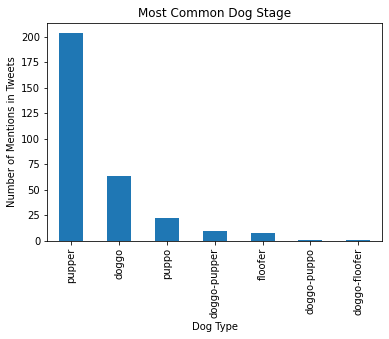

In [76]:
df_clean['dog_type'].value_counts().plot(kind = 'bar')
title1 = "Most Common Dog Stage"
plt.xlabel("Dog Type")
plt.ylabel("Number of Mentions in Tweets")
plt.title(title1)
plt.show()

### Insight #2:
Charlie is the most popular of the known dog names, with Lucy, Cooper and Oliver following closely behind.

In [69]:
df_clean['name'].value_counts()

Charlie       11
Lucy          10
Cooper        10
Oliver        10
Penny          9
              ..
Huxley         1
Bookstore      1
Jersey         1
Shiloh         1
Christoper     1
Name: name, Length: 913, dtype: int64

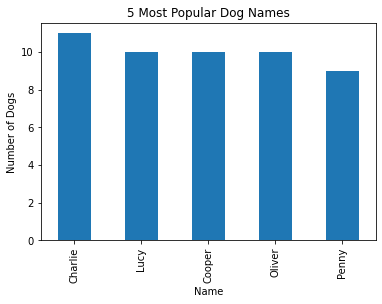

In [77]:
df_clean['name'].value_counts().nlargest(5).plot(kind = 'bar')
title2 = "5 Most Popular Dog Names"
plt.xlabel("Name")
plt.ylabel("Number of Dogs")
plt.title(title2)
plt.show()

### Insight #3:
December is the month with the most combined engagement (retweets & favourites) on tweets and is the month with the most retweets at 847,759. July is the month with the most favourites overall, with 2,172,565. Conversely, August is the month with both the least retweets and favourites.

In [71]:
df_clean['month'] = df_clean['timestamp'].dt.month
month = df_clean['month']
retweets = df_clean['retweet_count'].groupby(month).sum()
favourites = df_clean['favorite_count'].groupby(month).sum()

In [72]:
retweets.sort_values(ascending = False)

month
12    847759
1     679294
6     618882
7     555022
2     460559
5     441832
3     429191
11    417626
4     322952
10    277828
9     232299
8     232007
Name: retweet_count, dtype: int64

In [73]:
favourites.sort_values(ascending = False)

month
7     2172565
12    2160127
6     2042654
1     1971580
2     1672341
5     1572257
3     1535756
4     1190746
11    1148143
10     864121
9      720435
8      681425
Name: favorite_count, dtype: int64

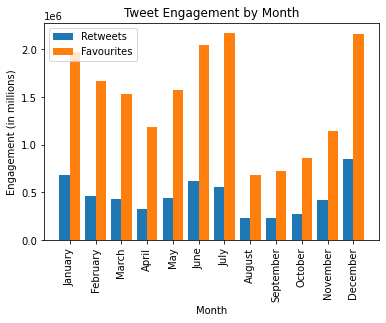

In [78]:
x_ax = np.arange(len(df_clean.groupby(month)))
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
title3 = 'Tweet Engagement by Month'
plt.bar(x_ax -0.2, retweets , width = 0.4, label = 'Retweets')
plt.bar(x_ax +0.2, favourites, width = 0.4, label = 'Favourites')
plt.xticks(x_ax, months, rotation = 'vertical')
plt.xlabel("Month")
plt.ylabel("Engagement (in millions)")
plt.legend(loc = 'upper left')
plt.title(title3)
plt.show()